# 1. Import Libraries

In [ ]:
!pip install seaborn
!pip install statsmodels
!pip install wordcloud

In [67]:
import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

import eda_helper_functions

from sklearn.ensemble import IsolationForest

from scipy import stats

# 2. Read the Training Data

In [30]:
file_path= r"C:\Users\jinni\Desktop\flights-sagemaker-project\data\train.csv"

train= pd.read_csv(file_path)

train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-03-27,Delhi,Cochin,11:30:00,18:50:00,440,1.0,No Info,12242
1,Jet Airways,2019-06-12,Delhi,Cochin,02:15:00,19:00:00,1005,1.0,No Info,14714
2,Jet Airways,2019-05-18,Kolkata,Banglore,08:25:00,22:35:00,850,1.0,In-flight meal not included,10844
3,Jet Airways,2019-05-09,Kolkata,Banglore,06:30:00,16:20:00,590,1.0,In-flight meal not included,8586
4,Indigo,2019-03-27,Delhi,Cochin,06:40:00,16:10:00,570,1.0,No Info,6442
...,...,...,...,...,...,...,...,...,...,...
635,Air India,2019-05-06,Kolkata,Banglore,09:25:00,18:30:00,545,1.0,No Info,8891
636,Jet Airways,2019-03-06,Banglore,New Delhi,14:05:00,09:30:00,1165,1.0,No Info,17261
637,Air India,2019-05-18,Kolkata,Banglore,09:50:00,23:15:00,805,2.0,No Info,15957
638,Air Asia,2019-04-21,Kolkata,Banglore,10:20:00,12:55:00,155,0.0,No Info,4409


In [31]:
train.dtypes

airline             object
date_of_journey     object
source              object
destination         object
dep_time            object
arrival_time        object
duration             int64
total_stops        float64
additional_info     object
price                int64
dtype: object

In [32]:
#update dtypes of a few columns- use assign()

train.assign(**{
    col:pd.to_datetime(train.loc[:,col], dayfirst=True)
    for col in ["date_of_journey", "dep_time","arrival_time" ]
})

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-03-27,Delhi,Cochin,2024-06-30 11:30:00,2024-06-30 18:50:00,440,1.0,No Info,12242
1,Jet Airways,2019-06-12,Delhi,Cochin,2024-06-30 02:15:00,2024-06-30 19:00:00,1005,1.0,No Info,14714
2,Jet Airways,2019-05-18,Kolkata,Banglore,2024-06-30 08:25:00,2024-06-30 22:35:00,850,1.0,In-flight meal not included,10844
3,Jet Airways,2019-05-09,Kolkata,Banglore,2024-06-30 06:30:00,2024-06-30 16:20:00,590,1.0,In-flight meal not included,8586
4,Indigo,2019-03-27,Delhi,Cochin,2024-06-30 06:40:00,2024-06-30 16:10:00,570,1.0,No Info,6442
...,...,...,...,...,...,...,...,...,...,...
635,Air India,2019-05-06,Kolkata,Banglore,2024-06-30 09:25:00,2024-06-30 18:30:00,545,1.0,No Info,8891
636,Jet Airways,2019-03-06,Banglore,New Delhi,2024-06-30 14:05:00,2024-06-30 09:30:00,1165,1.0,No Info,17261
637,Air India,2019-05-18,Kolkata,Banglore,2024-06-30 09:50:00,2024-06-30 23:15:00,805,2.0,No Info,15957
638,Air Asia,2019-04-21,Kolkata,Banglore,2024-06-30 10:20:00,2024-06-30 12:55:00,155,0.0,No Info,4409


In [33]:
train= train.assign(** {
    col: pd.to_datetime(train.loc[:, col], dayfirst=True)
    for col in ["date_of_journey", "dep_time","arrival_time" ]
})

train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-03-27,Delhi,Cochin,2024-06-30 11:30:00,2024-06-30 18:50:00,440,1.0,No Info,12242
1,Jet Airways,2019-06-12,Delhi,Cochin,2024-06-30 02:15:00,2024-06-30 19:00:00,1005,1.0,No Info,14714
2,Jet Airways,2019-05-18,Kolkata,Banglore,2024-06-30 08:25:00,2024-06-30 22:35:00,850,1.0,In-flight meal not included,10844
3,Jet Airways,2019-05-09,Kolkata,Banglore,2024-06-30 06:30:00,2024-06-30 16:20:00,590,1.0,In-flight meal not included,8586
4,Indigo,2019-03-27,Delhi,Cochin,2024-06-30 06:40:00,2024-06-30 16:10:00,570,1.0,No Info,6442
...,...,...,...,...,...,...,...,...,...,...
635,Air India,2019-05-06,Kolkata,Banglore,2024-06-30 09:25:00,2024-06-30 18:30:00,545,1.0,No Info,8891
636,Jet Airways,2019-03-06,Banglore,New Delhi,2024-06-30 14:05:00,2024-06-30 09:30:00,1165,1.0,No Info,17261
637,Air India,2019-05-18,Kolkata,Banglore,2024-06-30 09:50:00,2024-06-30 23:15:00,805,2.0,No Info,15957
638,Air Asia,2019-04-21,Kolkata,Banglore,2024-06-30 10:20:00,2024-06-30 12:55:00,155,0.0,No Info,4409


In [34]:
train.dtypes

airline                    object
date_of_journey    datetime64[ns]
source                     object
destination                object
dep_time           datetime64[ns]
arrival_time       datetime64[ns]
duration                    int64
total_stops               float64
additional_info            object
price                       int64
dtype: object

## 3. High Level Summary of Data

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          640 non-null    object        
 1   date_of_journey  640 non-null    datetime64[ns]
 2   source           640 non-null    object        
 3   destination      640 non-null    object        
 4   dep_time         640 non-null    datetime64[ns]
 5   arrival_time     640 non-null    datetime64[ns]
 6   duration         640 non-null    int64         
 7   total_stops      640 non-null    float64       
 8   additional_info  640 non-null    object        
 9   price            640 non-null    int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 50.1+ KB


In [36]:
train.describe() # 2 numerical columns
#observe that duration has extreme values (80-2295)
# better to analyse total_stops as a categorical variable


,duration,total_stops,price
count,640.000000,640.000000,640.00000
mean,598.718750,0.768750,8907.75625
std,486.524192,0.649756,4721.01835
min,80.000000,0.000000,1965.00000
25%,170.000000,0.000000,5072.00000
50%,495.000000,1.000000,8056.50000
75%,845.000000,1.000000,11827.25000
max,2295.000000,3.000000,54826.00000


In [37]:
train.describe(include='O') #for categorical vars (dtypes= object)

,airline,source,destination,additional_info
count,640,640,640,640
unique,9,5,6,5
top,Jet Airways,Delhi,Cochin,No Info
freq,205,258,258,492


In [38]:
# change dtype of total_tops to categorical
( 
    train
    .assign(total_stops= train["total_stops"].astype(object))
    .describe(include="O")
)

,airline,source,destination,total_stops,additional_info
count,640,640,640,640.0,640
unique,9,5,6,4.0,5
top,Jet Airways,Delhi,Cochin,1.0,No Info
freq,205,258,258,342.0,492


## 4. High Level Analysis of Missing Values

In [39]:
eda_helper_functions.missing_info(train) #none here

,count,percentage
variable,,


- missingno library in python can also be used
- https://github.com/ResidentMario/missingno

## 5. High Level Analysis of Ouliers
* Isolation Forest Algorithm

In [44]:
forest= IsolationForest(n_estimators=10, random_state=42)

In [45]:
( 
    train
    .assign(outlier= forest.fit_predict(train
                                        .drop(columns="price")
                                        .select_dtypes(include="number")))
)

#creating new column "oulier", using IsolationForest
#drop target var "price", perform only on numeric dtypes

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price,outlier
0,Jet Airways,2019-03-27,Delhi,Cochin,2024-06-30 11:30:00,2024-06-30 18:50:00,440,1.0,No Info,12242,1
1,Jet Airways,2019-06-12,Delhi,Cochin,2024-06-30 02:15:00,2024-06-30 19:00:00,1005,1.0,No Info,14714,-1
2,Jet Airways,2019-05-18,Kolkata,Banglore,2024-06-30 08:25:00,2024-06-30 22:35:00,850,1.0,In-flight meal not included,10844,1
3,Jet Airways,2019-05-09,Kolkata,Banglore,2024-06-30 06:30:00,2024-06-30 16:20:00,590,1.0,In-flight meal not included,8586,1
4,Indigo,2019-03-27,Delhi,Cochin,2024-06-30 06:40:00,2024-06-30 16:10:00,570,1.0,No Info,6442,1
...,...,...,...,...,...,...,...,...,...,...,...
635,Air India,2019-05-06,Kolkata,Banglore,2024-06-30 09:25:00,2024-06-30 18:30:00,545,1.0,No Info,8891,1
636,Jet Airways,2019-03-06,Banglore,New Delhi,2024-06-30 14:05:00,2024-06-30 09:30:00,1165,1.0,No Info,17261,-1
637,Air India,2019-05-18,Kolkata,Banglore,2024-06-30 09:50:00,2024-06-30 23:15:00,805,2.0,No Info,15957,-1
638,Air Asia,2019-04-21,Kolkata,Banglore,2024-06-30 10:20:00,2024-06-30 12:55:00,155,0.0,No Info,4409,1


In [46]:
#filter out outliers using query

(
    train
    .assign(outlier= forest.fit_predict(train
                                       .drop(columns= "price")
                                       .select_dtypes(include="number")))
.query("outlier ==-1") #get all outliers
)


,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price,outlier
1,Jet Airways,2019-06-12,Delhi,Cochin,2024-06-30 02:15:00,2024-06-30 19:00:00,1005,1.0,No Info,14714,-1
5,Jet Airways,2019-06-24,Mumbai,Hyderabad,2024-06-30 02:55:00,2024-06-30 04:20:00,85,0.0,No Info,5678,-1
6,Spicejet,2019-03-01,Mumbai,Hyderabad,2024-06-30 05:45:00,2024-06-30 07:05:00,80,0.0,No Info,12475,-1
12,Air India,2019-03-09,Delhi,Cochin,2024-06-30 06:10:00,2024-06-30 23:00:00,1010,1.0,No Info,9064,-1
13,Jet Airways,2019-06-12,Delhi,Cochin,2024-06-30 09:40:00,2024-06-30 19:00:00,560,2.0,In-flight meal not included,10368,-1
...,...,...,...,...,...,...,...,...,...,...,...
626,Vistara,2019-05-06,Kolkata,Banglore,2024-06-30 07:10:00,2024-06-30 22:40:00,930,1.0,No Info,8452,-1
629,Indigo,2019-05-24,Kolkata,Banglore,2024-06-30 19:20:00,2024-06-30 23:45:00,265,1.0,No Info,3809,-1
633,Jet Airways,2019-05-09,Delhi,Cochin,2024-06-30 23:05:00,2024-06-30 04:25:00,1760,2.0,No Info,15129,-1
636,Jet Airways,2019-03-06,Banglore,New Delhi,2024-06-30 14:05:00,2024-06-30 09:30:00,1165,1.0,No Info,17261,-1


In [47]:
# to further analyse them
(
    train
    .assign(outlier= forest.fit_predict(train
                                       .drop(columns= "price")
                                       .select_dtypes(include="number")))
.query("outlier ==-1") 
.duration
.describe() #verify if genuine outliers or not
)


count     267.000000
mean      843.127341
std       619.575751
min        80.000000
25%       180.000000
50%       930.000000
75%      1400.000000
max      2295.000000
Name: duration, dtype: float64

## 6. Pair Plots
* Made for all numeric vars (each combination of them)
* We have total_stops, duration, and price

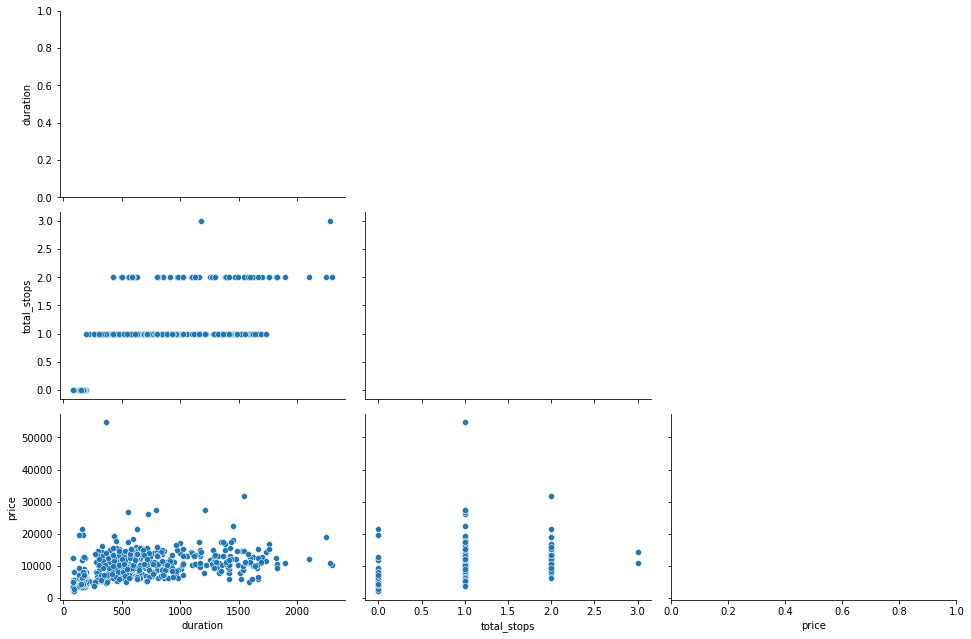

In [48]:
eda_helper_functions.pair_plots(train)

### 6.1 Observations from Pair Plots
* Bottom left- duration v/s price- somewhat linear relation- as duration increases/ the longer the flights- the more expensive the tickets are.

* Bottom right- total stops v/s price- almost same price for the stops- can't draw major conclusions.

* Top left- duration v/s total_stops- flights with 0 stops are of less duration and with 2 stops are of more duration

## 7. Correlation Analysis

* should not be multi-collinear.

In [50]:
train.corr(method="spearman")

,duration,total_stops,price
duration,1.000000,0.829324,0.682711
total_stops,0.829324,1.000000,0.699829
price,0.682711,0.699829,1.000000


In [60]:
# correlation matrix heatmap
#above data as a map
def correlation_heatmap(data,
                        figsize=(12, 6),
                        method="spearman",
                        cmap="RdBu"):
  cm = data.corr(method=method) #correlation matrix

  mask = np.zeros_like(cm, dtype=bool)
  mask[np.triu_indices_from(mask)] = True #get indices of upper triangular values

  fig, ax = plt.subplots(figsize=figsize)
  hm = sns.heatmap(
      cm,
      vmin=-1,
      vmax=1,
      cmap=cmap,
      center=0,
      annot=True,
      fmt=".2f",
      linewidths=1.5,
      square=True,
      mask=mask, #upper half values hidden (value =True)- only lower triangle visible
      ax=ax
  )
  #rotate_xlabels(ax)
  #rotate_ylabels(ax)
  ax.set(title=f"{method.title()} Correlation Matrix Heatmap")

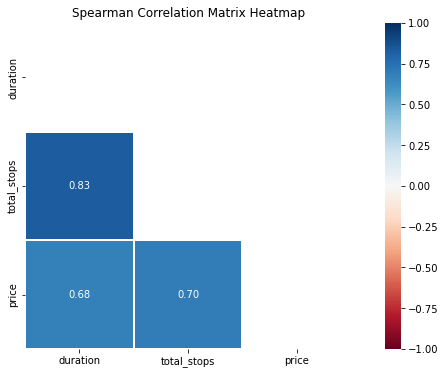

In [61]:
correlation_heatmap(train)
#0.83 is a pretty high value of collinearity- problem for linear regression, lasso etc. Ok for trees

In [78]:
# eda_helper_functions.cramersV_heatmap(train) -correct helper function (as below)

In [76]:
def get_chi2_statistic(data, var1, var2):
    
    # Create a contingency table
    ct = pd.crosstab(data[var1], data[var2])
    
    # Perform Chi-square test
    chi2, _, _, _ = stats.chi2_contingency(ct) #returns 4 vars (scipy)
    
    # Return the Chi-square statistic
    return chi2



def cramers_v(data, var1, var2): #cramers_v for categorical vars
  ct = pd.crosstab(
      data.loc[:, var1],
      data.loc[:, var2] 
  )
  r, c = ct.shape
  n = ct.sum().sum()

    

  chi2 = get_chi2_statistic(data,var1,var2)
  phi2 = chi2 / n

  # bias correction
  phi2_ = max(0, phi2 - ((r - 1) * (c - 1) / (n - 1)))
  r_ = r - (((r - 1) ** 2) / (n - 1))
  c_ = c - (((c - 1) ** 2) / (n - 1))

  return np.sqrt(phi2_ / min(r_ - 1, c_ - 1))


def cramersV_heatmap(data, figsize=(12, 6), cmap="Blues"):
  cols = data.select_dtypes(include="O").columns.to_list()

  matrix = (
      pd
      .DataFrame(data=np.ones((len(cols), len(cols))))
      .set_axis(cols, axis=0)
      .set_axis(cols, axis=1)
  )

  for col1 in cols:
    for col2 in cols:
      if col1 != col2:
        matrix.loc[col1, col2] = cramers_v(data, col1, col2)

  mask = np.zeros_like(matrix, dtype=bool)
  mask[np.triu_indices_from(mask)] = True
  
  fig, ax = plt.subplots(figsize=figsize)
  hm = sns.heatmap(
      matrix,
      vmin=0,
      vmax=1,
      cmap=cmap,
      annot=True,
      fmt=".2f",
      square=True,
      linewidths=1.5,
      mask=mask,
      ax=ax
  )
  ax.set(title="Cramer's V Correlation Matrix Heatmap")

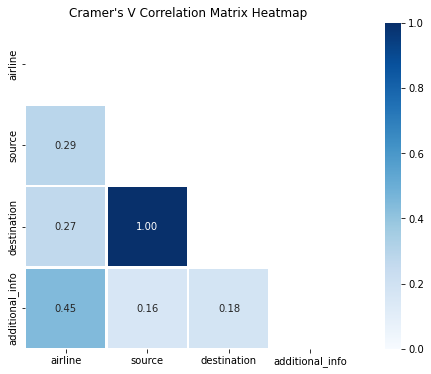

In [77]:
cramersV_heatmap(train)